# Naive Bayes Classifier By Hand

We're going to create our own Naive Bayes classifier to classify if the given information about a person's height, weight, and age indicate that this person is male or female.

For this, we'll use a custom dataset called `people.csv`, which you'll find in the `datasets/` folder.

In [46]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# This gives us dataframes which will allow us to build our custom
# Naive Bayes Classifier
import pandas as pd

# Standard numeric library that gives us optimized arrays and vectors
import numpy as np

# Import datasets, and performance metrics
from sklearn import datasets, metrics

# Import the Multi-Layer Perceptron Classifier. This is the model we will train.
from sklearn.neural_network import MLPClassifier

In [47]:
dataset = "datasets/people.csv"

# We can read in a properly formatted CSV using this helper function.
# This reads it in as a pandas dataframe object, which gives us a lot
# of the same functionality we get in Excel like filtering, sorting, etc
df = pd.read_csv(dataset)

# This head() function gives us the first 5 items, which Jupyter notebook
# formats nicely for us.
df.head()

,Height,Weight,Age,Gender
0,151.765,47.825606,63.0,male
1,139.700,36.485807,63.0,female
2,136.525,31.864838,65.0,female
3,156.845,53.041915,41.0,male
4,145.415,41.276872,51.0,female


####  Training Set and Test Set

Now, we're going to split our dataset up into test and training. We want 70% of our data to go for testing, 30% for testing.


In [48]:
# This is how many examples we have.
n_samples = df.shape[0]
print(n_samples)

# TODO: Compute train_size and test_size
train_size = int(n_samples * 0.70)
test_size = n_samples - train_size

print("Training set size: {}".format(train_size))
print("Test set size: {}".format(test_size))


543
Training set size: 380
Test set size: 163


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


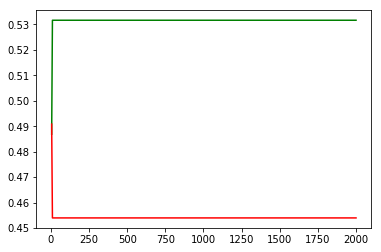

In [49]:
data = []
gender = []
for row in df.itertuples():
    row = list(row)
    gender.append(row[4])
    del row[4]
    del row[0]
    row = tuple(row)
    data.append(row)
    
# We need to now create our test and train splits

# We'll train on 70% of our data
train_X = data[:train_size]
train_y = gender[:train_size]
# The remaining samples are for our test set

test_X = data[train_size:]
test_y = gender[train_size:]


epoch_counts = [5, 10, 20, 50, 100, 140, 200, 500, 1000, 2000] # We'll loop over this and set the MLP max iterations to this
classifiers = [] # Append your classifiers here after applying .fit() to them

train_accs = [] # Append train accuracies here
test_accs = [] # Append test accuracies here

for epoch_count in epoch_counts:
    # TODO: Use the epoch_count variable here, refer to MLP docs
    classifier = MLPClassifier(random_state=42,max_iter=epoch_count)
    # TODO: Use the fit() function here
    classifier.fit(train_X, train_y)
    # TODO: Compute the accuracies below
    train_error = classifier.score(train_X, train_y)
    test_error = classifier.score(test_X, test_y)
    
    train_acc = train_error
    test_acc = test_error
    
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    
    # Now let's plot the results
plt.plot(epoch_counts, train_accs, "g")
plt.plot(epoch_counts, test_accs, "r")


## Recap: Bayes Theorem

Bayes theorem is a famous equation that allows us to make predictions based on data:

$$
P(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)}
$$

Specifically, we're trying to figure out the class (i.e. "male" or "female") of an observation _given_ the data

$$
p(class \mid \mathbf{data}) = \frac{p(\mathbf{data} \mid class) * p(class)}{p(\mathbf{data})}
$$


where:
- class is a particular class (i.e. "male" or "female")
- $\mathbf{data}$ is an observation's data (the features)
- $p(class \mid \mathbf{data})$ is called the posterior
- $p(\mathbf{data} \mid class)$ is called the likelihood
- $p(class)$ is called the prior
- $p(\mathbf{data})$ is called the marginal probability

### Bayes Theorem Applied to Predicting "Male" or "Female"

$$
p(person\:is\:male \mid \mathbf{person's\:data}) = \frac{
p(\mathbf{person's\:data}\mid person\:is\:male) * p(person\:is\:male)
}{
p(\mathbf{person's\:data})
}
$$

#### More Specifically:
Let's factor in height, weight, age
$$
posterior(male) = \frac{
p(height \mid male)\,p(weight|male)\,p(age \mid male)\,p(male)
}{
\mathit{marginal\;probability}
}
$$


__Two things to note:__

1. We assume each feature is uncorrelated from each other. This independence assumption of Naive Bayes is what makes it "Naive". This assumption may not be true in the real world but let's stick with it and see what happens.

2. We assume that the value of the features (height of the women, weight of the women) are normally (gaussian) distributed. This means that $p(height \mid female)$ is calculated by inputing the required parameters into the probability density function of the normal distribution:

__WARNING__: Very mathy, but we'll just have one helper function do this for us.

$$
p(height \mid female) = \frac{1}{\sqrt{2\pi(\text{variance of female height in data})}}
- e^{-\frac{
 (\text{observation's height} - \text{average height of females in the data})^2
}{
2*(\text{variance of female height in data})
}
}
$$




## Pandas Documentation
Refer to [pandas docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.var.html) for this next part.

## Apply Bayes Classifier to New Data Point

Now, all we have to do when we get a new datapoint is extract the features out and compare which label has a higher
probability.